<a href="https://colab.research.google.com/github/AntioTseng/LSTM2/blob/main/LSTM_%E5%AF%8C%E9%82%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib   
import matplotlib.pyplot as plt  # for 畫圖用
from matplotlib.font_manager import FontProperties
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.callbacks import EarlyStopping, ModelCheckpoint
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import math

In [ ]:
data=pd.read_csv("2881.csv", header=0)
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x,"%Y/%m/%d"))

FileNotFoundError: ignored

In [ ]:
data.columns.to_frame()

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (15,10))
plt.plot(data['Date'], data['Close'], label='Fubon Financial Holding Co., Ltd. (2881.TW)', color='#1f77b4')
plt.legend(loc='best')
plt.fill_between(data['Date'], data['Close'].to_list(), 30, color='#9467bd', alpha=0.1, label = 'Value')
plt.ylabel("Close")
plt.grid(color='#7f7f7f', linestyle='dashed', linewidth=1, alpha=0.3)
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(data['Date'], data['High'], label='High', color='dodgerblue')
plt.plot(data['Date'], data['Low'], label='Low', color= '#6A5ACD')
plt.legend(loc='best')
#plt.ylabel("Close")
plt.show()

In [ ]:
for i in range(0,len(data.columns)):
  print(type(data.iloc[4,i]))
print(data.columns)

In [ ]:
data['Spread'] = data['Spread'].values.astype(np.float64)
data['TradingVol'] = data['TradingVol'].values.astype(np.float64)
data['DollorVol'] = data['DollorVol'].values.astype(np.float64)
data['Turnover'] = data['Turnover'].values.astype(np.float64)
data['MTradingVol'] = data['MTradingVol'].values.astype(np.float64)
data['Mturnover'] = data['Mturnover'].values.astype(np.float64)

In [ ]:
# 新增交互作用
def AugFeatures(data):
    cols = data.columns
    df = data.copy()
    for i in range(1, len(cols)):
        for j in range(i+1, len(cols)):
            df[cols[i]+cols[j]] = df[cols[i]]*df[cols[j]]
    return df

Aug_data = AugFeatures(data)
Aug_data = Aug_data.drop(labels=['Date'],axis=1)

In [ ]:
from sklearn.preprocessing import Normalizer
scaler=preprocessing.MinMaxScaler().fit(Aug_data)
sc_data = scaler.transform(Aug_data)

In [ ]:
train, test = train_test_split(
    sc_data, train_size=0.7, shuffle = False
)

In [ ]:
date = data['Date']
train_date = date[:424]
test_date = date[424:]
plt.figure(figsize=(10,6))
ax = Aug_data.iloc[:train.shape[0],0].plot()
Aug_data.iloc[train.shape[0]:,0].plot(ax=ax)
plt.title("Split data", fontsize=20)
plt.grid(color='#7f7f7f', linestyle='dashed', linewidth=1, alpha=0.3)
plt.legend(['train', 'test'])

In [ ]:
X_train = train[:,1:]
y_train = train[:,0]
X_test = test[:,1:]
y_test = test[:,0]

In [ ]:
# 資料維度轉換
def train_PrepData(data, N, K):
    df = pd.DataFrame(data)
    X, Y = [], []
    #N = 20 (timesteps)
    #K = 1 (predict_day)
    for i in range(df.shape[0]-N-K+1):
        a = df[i:(i+N)]
        X.append(a)
        Y.append(np.array(df.iloc[i+N:i+N+K,0]))
    return np.array(X), np.array(Y)

In [ ]:
# 訓練資料維度轉換
X_train, y_train = train_PrepData(train, 30, 1)
# 訓練資料維度轉換
X_test, y_test = train_PrepData(test, 30, 1)

In [ ]:
# LSTM層(兩層) + 丟棄層 + 全連接層
def buildmodel(N, F, n1, n2, p):

    model = Sequential()

    # 第1層的 LSTM layer
    model.add(LSTM(n1, input_shape=(N, F), return_sequences=True))

    # 第2層的 LSTM layer
    #model.add(LSTM(n2, return_sequences=True))

    # 第2層的 LSTM layer
    model.add(LSTM(n2, return_sequences=False))

    # 第3層的 Dropout layer
    model.add(Dropout(p))


    
    # 第4層的 Fully-Connected layer
    model.add(Dense(1))
        
    model.compile(loss="mse", optimizer="adam")
    return model

Epoch 1/300
12/12 [==============================] - 17s 517ms/step - loss: 0.0687 - val_loss: 0.0034
Epoch 2/300
12/12 [==============================] - 1s 92ms/step - loss: 0.0165 - val_loss: 0.0069
Epoch 3/300
12/12 [==============================] - 2s 194ms/step - loss: 0.0100 - val_loss: 0.0555
Epoch 4/300
12/12 [==============================] - 1s 65ms/step - loss: 0.0071 - val_loss: 0.0146
Epoch 5/300
12/12 [==============================] - 2s 133ms/step - loss: 0.0054 - val_loss: 0.0104
Epoch 6/300
12/12 [==============================] - 1s 122ms/step - loss: 0.0035 - val_loss: 0.0127
Epoch 7/300
12/12 [==============================] - 2s 146ms/step - loss: 0.0027 - val_loss: 0.0143
Epoch 8/300
12/12 [==============================] - 1s 67ms/step - loss: 0.0031 - val_loss: 0.0166
Epoch 9/300
12/12 [==============================] - 1s 99ms/step - loss: 0.0025 - val_loss: 0.0120
Epoch 10/300
12/12 [==============================] - 3s 244ms/step - loss: 0.0023 - val_loss:

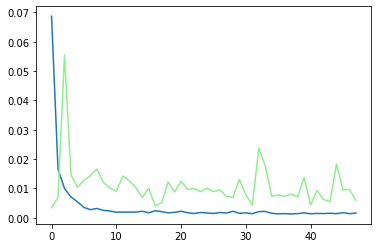

In [ ]:
# 輸入model參數
model = buildmodel(X_train.shape[1],X_train.shape[2],128,64,0.2)

# 進行訓練
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
history = model.fit(X_train, y_train, epochs=300, batch_size=30, validation_split=0.1, verbose=1, callbacks=[callback])
#, callbacks=[callback]
# 對訓練過程的損失函數繪圖
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'lightgreen')

In [ ]:
# 產生預測值
predicted_value = model.predict(X_test)

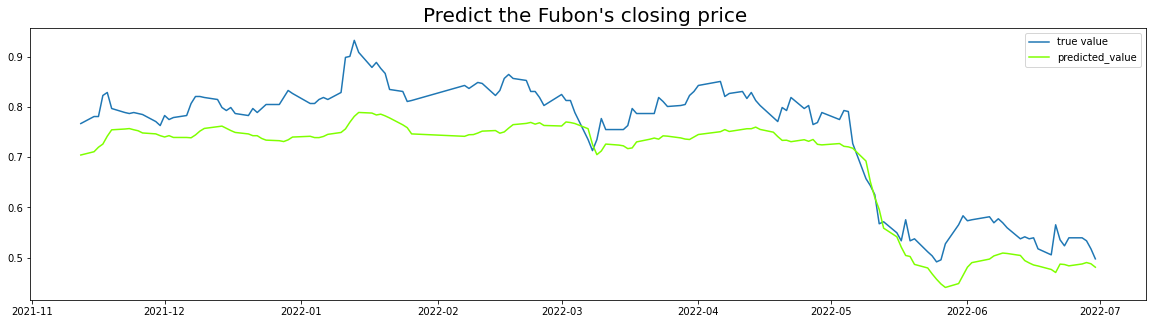

In [ ]:
data=pd.read_csv("2881.csv", header=0)
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x,"%Y/%m/%d"))
Date = data['Date']
test_date = Date[-152:]
plt.figure(figsize = (20,5))
plt.plot(test_date, y_test, label='true value',  color = '#1f77b4')
plt.plot(test_date, predicted_value, label='predicted_value',  color ='chartreuse')
plt.title("Predict the Fubon's closing price ", fontsize=20)
plt.legend(loc='best')
plt.show()

In [ ]:
import random
random.seed( 10 )

Epoch 1/300
12/12 [==============================] - 66s 144ms/step - loss: 0.1421 - val_loss: 0.1052
Epoch 2/300
12/12 [==============================] - 1s 52ms/step - loss: 0.0546 - val_loss: 0.1452
Epoch 3/300
12/12 [==============================] - 1s 51ms/step - loss: 0.0450 - val_loss: 0.1122
Epoch 4/300
12/12 [==============================] - 1s 103ms/step - loss: 0.0249 - val_loss: 0.0962
Epoch 5/300
12/12 [==============================] - 1s 51ms/step - loss: 0.0236 - val_loss: 0.0416
Epoch 6/300
12/12 [==============================] - 1s 51ms/step - loss: 0.0216 - val_loss: 0.0604
Epoch 7/300
12/12 [==============================] - 1s 128ms/step - loss: 0.0209 - val_loss: 0.0233
Epoch 8/300
12/12 [==============================] - 1s 50ms/step - loss: 0.0178 - val_loss: 0.0234
Epoch 9/300
12/12 [==============================] - 1s 125ms/step - loss: 0.0181 - val_loss: 0.0218
Epoch 10/300
12/12 [==============================] - 1s 51ms/step - loss: 0.0156 - val_loss: 0

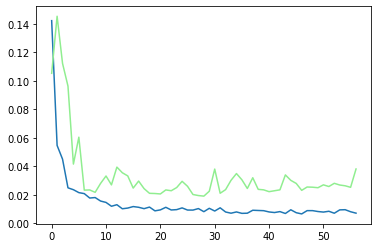

In [ ]:
# 輸入model參數
model = buildmodel(X_train.shape[1],X_train.shape[2],128,64,0.2)
#100 70 0.1, 400 350 0.2

# 進行訓練
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
history = model.fit(X_train, y_train, epochs=300, batch_size=30, validation_split=0.1, verbose=1, callbacks=[callback])
#, callbacks=[callback]
# 對訓練過程的損失函數繪圖
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'lightgreen')
# 產生預測值
predicted_value = model.predict(X_test)

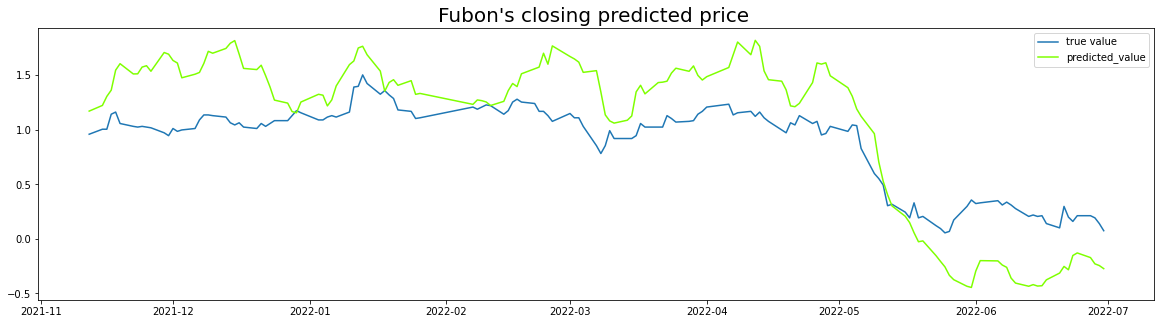

In [ ]:
data=pd.read_csv("2881.csv", header=0)
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x,"%Y/%m/%d"))
Date = data['Date']
test_date = Date[-152:]
plt.figure(figsize = (20,5))
plt.plot(test_date, y_test, label='true value',  color = '#1f77b4')
plt.plot(test_date, predicted_value, label='predicted_value',  color ='chartreuse')
plt.title("Fubon's closing predicted price ", fontsize=20)
plt.legend(loc='best')
plt.show()

In [ ]:
MSE = mean_squared_error(y_test, predicted_value)
RMSE = math.sqrt(MSE)
print(MSE, RMSE)

8.44040944062535 2.9052382760498925


In [ ]:
#from pmdarima import auto_arima
#model = auto_arima(
#	df_train["VWAP"],
#	exogenous=df_train[exogenous_features],
#	trace=True,
#	error_action="ignore",
#	suppress_warnings=True)

In [ ]:
#forecast = model.predict(n_periods=len(df_valid),  exogenous=df_valid[exogenous_features])

In [ ]:
#from prophet import Prophet
#model = Prophet()
#for feature in exogenous_features:
#	model.add_regressor(feature)
#model.fit(df_train[["Date", "VWAP"] + exogenous_features].rename(columns={"Date": "ds", "VWAP": "y"}))
#forecast = model.predict(df_test[["Date", "VWAP"] + exogenous_features].rename(columns={"Date": "ds"}))



**-----------------------------------------------------------------------------------------------------------------------------------------------------------------**



In [ ]:
data=pd.read_csv("yahoo2881.csv", header=0)
#data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x,"%Y/%m/%d"))

In [ ]:
AdjClose = data['Adj Close']
data.drop(['Date','Adj Close'], axis=1, inplace = True)
data.insert(0, 'Adj Close', AdjClose)

In [ ]:
def AugFeatures(data):
    cols = data.columns
    df = data.copy()
    for i in range(1, len(cols)):
        for j in range(i+1, len(cols)):
            df[cols[i]+cols[j]] = df[cols[i]]*df[cols[j]]
    return df

In [ ]:
#new_train_data = AugFeatures(train_data)
#new_test_data = AugFeatures(test_data)
Aug_data = AugFeatures(data)

In [ ]:
from sklearn.preprocessing import Normalizer
scaler=preprocessing.MinMaxScaler().fit(Aug_data)
sc_data = scaler.transform(Aug_data)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(
    sc_data, train_size=0.7, shuffle = False
)

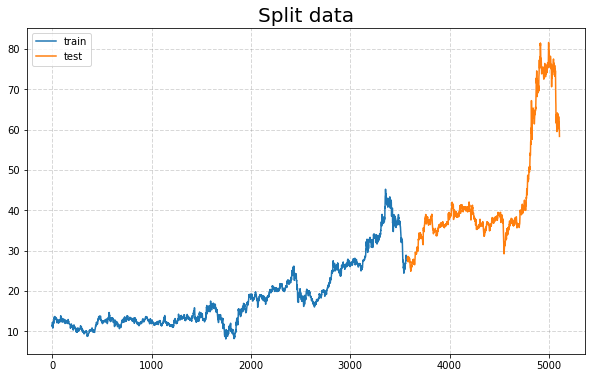

In [ ]:
Date_data=pd.read_csv("yahoo2881.csv", header=0)
Date_data['Date'] = Date_data['Date'].apply(lambda x: datetime.strptime(x,"%Y/%m/%d"))
date = Date_data['Date']
train_date = date[:len(train_data)]
test_date = date[len(train_data):]
plt.figure(figsize=(10,6))
ax = data.iloc[:train_data.shape[0],0].plot()
data.iloc[train_data.shape[0]:,0].plot(ax=ax)
plt.title("Split data", fontsize=20)
plt.grid(color='#7f7f7f', linestyle='dashed', linewidth=1, alpha=0.3)
plt.legend(['train', 'test'])

In [ ]:
#from sklearn.preprocessing import Normalizer
#scaler=preprocessing.Normalizer().fit(new_train_data)
#train = scaler.transform(new_train_data)
#scaler=preprocessing.StandardScaler().fit(new_test_data)
#test = scaler.transform(new_test_data)

In [ ]:
# 資料維度轉換
def PrepData(data, N, K):
    df = pd.DataFrame(data)
    X, Y = [], []
    #df.shape[0] = 總共有?天筆資料
    for i in range(N, df.shape[0]):
      #iloc指定位置, loc指定數值
      X.append(np.array(df.iloc[i-N:i,1:16]))
      Y.append(np.array(df.iloc[i,0]))
    return np.array(X), np.array(Y)
# 訓練資料維度轉換
X_train, y_train = PrepData(train_data, 30, 1)
X_test, y_test = PrepData(test_data, 30, 1)

In [ ]:
# LSTM層(兩層) + 丟棄層 + 全連接層
def buildmodel(N, F, n1, n2, p):

    model = Sequential()

    # 第1層的 LSTM layer
    model.add(LSTM(n1, input_shape=(N, F), return_sequences=True))
    
    # 第2層的 LSTM layer
    model.add(LSTM(n2, return_sequences=False))

    # 第3層的 Dropout layer
    model.add(Dropout(p))
  
    # 第4層的 Fully-Connected layer
    model.add(Dense(1))
    #, activation='tanh'

    model.compile(loss="mse", optimizer="adam")
    return model

3190/3190 [==============================] - 69s 20ms/step - loss: 7.5744e-04 - val_loss: 0.0010


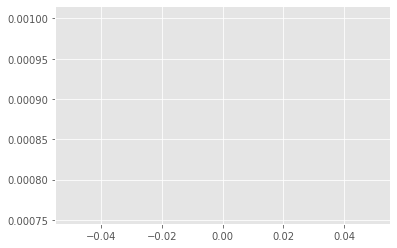

In [ ]:
# 輸入model參數
model = buildmodel(X_train.shape[1],X_train.shape[2],128,64,0.2)

# 進行訓練
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
history = model.fit(X_train, y_train, epochs=1, batch_size=1, validation_split=0.1, verbose=1)
#, callbacks=[callback]
# 對訓練過程的損失函數繪圖
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'lightgreen')

In [ ]:
# 產生預測值
predicted_value = model.predict(X_test)

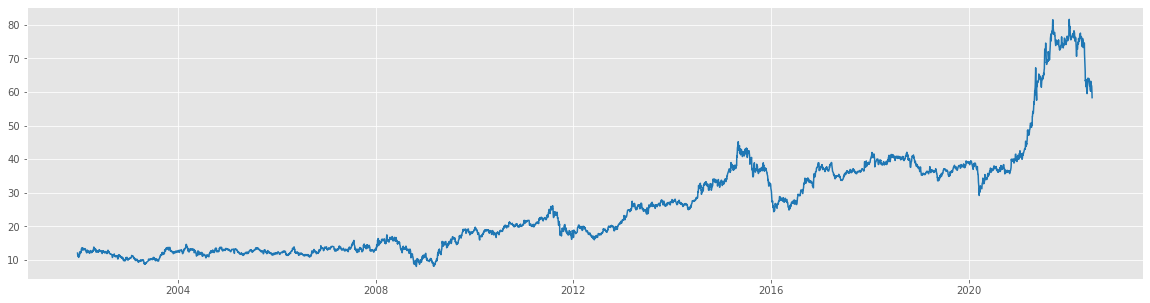

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (20,5))
plt.plot(date, data['Adj Close'], label='predicted_value',  color ='#1f77b4')

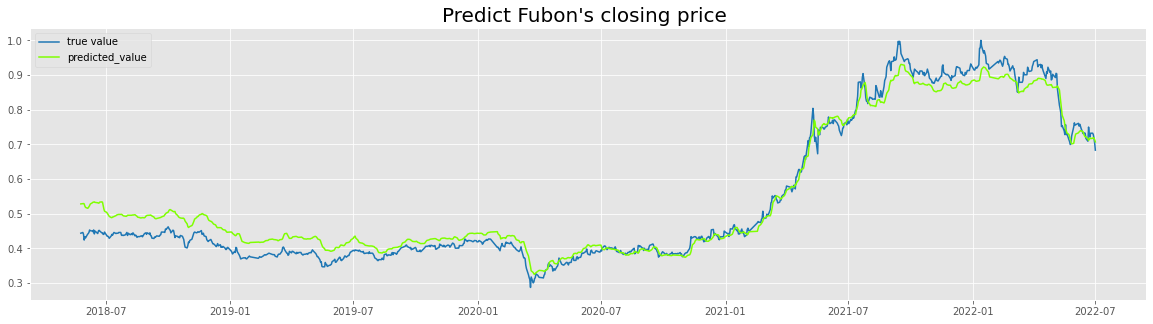

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(test_date[-1000:], y_test[-1000:], label='true value',  color = '#1f77b4')
plt.plot(test_date[-1000:], predicted_value[-1000:]+0.15, label='predicted_value',  color ='chartreuse')
plt.title("Predict Fubon's closing price ", fontsize=20)
plt.legend(loc='best')
plt.show()

In [ ]:
! pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Aug_data

,Adj Close,Open,High,Low,Close,Volume,OpenHigh,OpenLow,OpenClose,OpenVolume,HighLow,HighClose,HighVolume,LowClose,LowVolume,CloseVolume
0,12.042424,27.689680,27.771360,26.219433,26.627834,43048085.0,768.980072,726.007710,737.316203,1.191988e+09,728.149313,739.491164,1.195504e+09,698.166709,1.128696e+09,1.146277e+09
1,11.562208,25.729349,27.036238,25.320948,25.565989,31092999.0,695.624803,651.491508,657.796254,8.000026e+08,684.583177,691.208163,8.406377e+08,647.355078,7.873042e+08,7.949233e+08
2,11.081986,25.729349,25.974392,24.504143,24.504143,15036163.0,668.304197,630.475647,630.475647,3.868707e+08,636.480216,636.480216,3.905552e+08,600.453024,3.684483e+08,3.684483e+08
3,11.599147,24.667503,25.811029,24.667503,25.647669,25501124.0,636.693635,608.485704,632.663952,6.290491e+08,636.693635,661.992728,6.582103e+08,632.663952,6.290491e+08,6.540444e+08
4,11.229746,25.647669,25.811029,24.585823,24.830864,18905472.0,661.992728,630.569050,636.853781,4.848813e+08,634.585390,640.910151,4.879697e+08,610.487227,4.648066e+08,4.694392e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,61.900002,62.599998,62.799999,61.900002,61.900002,14465556.0,3931.279812,3874.940001,3874.940001,9.055438e+08,3887.320064,3887.320064,9.084369e+08,3831.610248,8.954179e+08,8.954179e+08
5104,61.599998,62.000000,62.099998,61.200001,61.599998,11419541.0,3850.199876,3794.400062,3819.199876,7.080115e+08,3800.519940,3825.359753,7.091535e+08,3769.919939,6.988759e+08,7.034437e+08
5105,60.799999,60.900002,61.200001,60.500000,60.799999,17760308.0,3727.080183,3684.450121,3702.720061,1.081603e+09,3702.600060,3720.960000,1.086931e+09,3678.399940,1.074499e+09,1.079827e+09
5106,59.799999,60.500000,60.799999,59.799999,59.799999,19605900.0,3678.399940,3617.899940,3617.899940,1.186157e+09,3635.839879,3635.839879,1.192039e+09,3576.039880,1.172433e+09,1.172433e+09


In [ ]:
ts_data=pd.read_csv("yahoo2881.csv", header=0,index_col=0)
ts_data = ts_data['Adj Close']

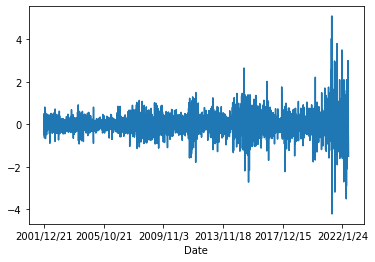

In [ ]:
data_diff = ts_data.diff()
data_diff.dropna(inplace=True)
data_diff.plot()
plt.show()

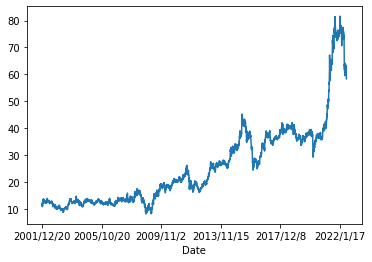

In [ ]:
ts_data.plot()
plt.show()

In [ ]:
ts_data = pd.DataFrame(ts_data)

In [ ]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic', 'p-value', 'Number of lags used', 'Number of observations used']
    out = pd.Series(result[0:4], index=labels)
    for k, v in result[4].items():
        out[f'critical value ({k})'] = v

    print(out)
    if result[1] <= 0.05:  # 有顯著性，推翻虛無假設
        print("Data has no unit root and is stationary")
    else:
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(ts_data, test)

Augmented Dickey-Fuller Test: [[-1.07964014 -0.90612557 -0.9197354  ... -0.78773939 -0.22206457
  -0.21758878]
 [-1.09688123 -0.90612557 -0.89042523 ... -0.79492757 -0.10966031
  -0.1162474 ]
 [-1.10673372 -0.94687494 -0.94538168 ... -0.81768825 -0.03613086
  -0.02868313]
 ...
 [ 1.23570101  1.07133062  1.05650506 ...  0.92271404  0.16200916
   0.15379075]
 [ 1.16492768  1.03873096  1.02426368 ...  0.84819572  0.28119327
   0.26423346]
 [ 1.05876769  0.98168175  0.96784146 ...  0.70649748  1.11675019
   1.09452277]]
ADF test statistic               -0.256110
p-value                           0.931495
Number of lags used              27.000000
Number of observations used    5078.000000
critical value (1%)              -3.431638
critical value (5%)              -2.862109
critical value (10%)             -2.567073
dtype: float64
Data has a unit root and is non-stationary


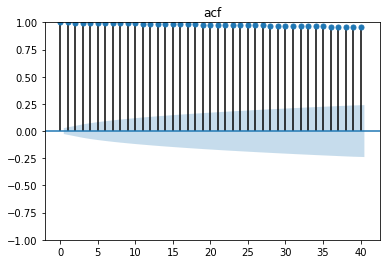

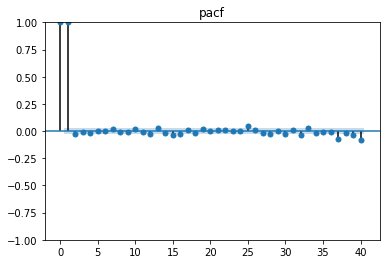

In [ ]:
ts_data = ts_data.dropna()
plot_acf(ts_data, lags=40)
plt.title('acf')
plt.show()
plot_pacf(ts_data, lags=40)
plt.title('pacf')
plt.show()

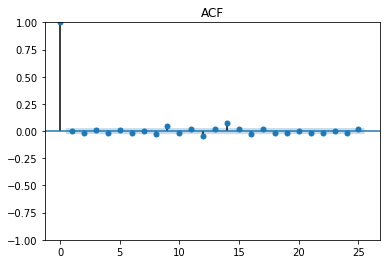

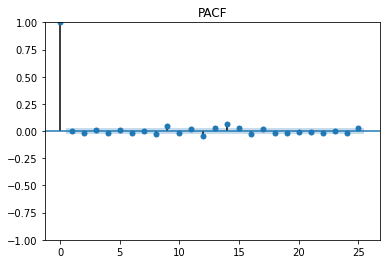

In [ ]:
acf = plot_acf(data_diff,lags=25)
plt.title('ACF')
acf.show()
pacf = plot_pacf(data_diff,lags=25)
plt.title('PACF')
pacf.show()
plt.show()

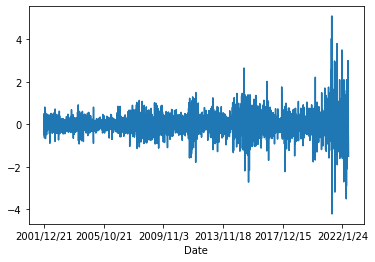

In [ ]:
data_diff.plot()
plt.show()

In [ ]:
test_date

3575   2016-03-22
3576   2016-03-23
3577   2016-03-24
3578   2016-03-25
3579   2016-03-28
          ...    
5103   2022-06-27
5104   2022-06-28
5105   2022-06-29
5106   2022-06-30
5107   2022-07-01
Name: Date, Length: 1533, dtype: datetime64[ns]